In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.manifold import *
from sklearn.decomposition import *
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
#from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans

from scipy import stats
import math

from time import time

from scipy.misc import imread, imresize

pd.set_option('max_rows', 10)

from sklearn.metrics import confusion_matrix, accuracy_score, auc, log_loss

from sklearn.cross_validation import StratifiedShuffleSplit

In [2]:
df = pd.read_csv('Data/Output 2016-06-10 19-53-39.csv')

In [3]:
n_rows, n_feat = df.shape
print(n_feat)

1275


In [4]:
X = df.ix[:,0:n_feat-1]
Y = pd.DataFrame(df.ix[:,n_feat-1])

In [5]:
labels = pd.get_dummies(Y)

In [6]:
labels.shape

(1919, 9)

In [7]:
X.shape

(1919, 1274)

In [43]:
# LLE
print("Computing LLE embedding")
t0 = time()
inputs, err = locally_linear_embedding(X.values, n_neighbors=15, n_components=2, method="standard")
inputs = pd.DataFrame(inputs)
t1 = time()
print("Done. Reconstruction error: %g. Time %.2f sec" % ( err, (t1 - t0)))


Computing LLE embedding
Done. Reconstruction error: 2.46004e-06. Time 6.88 sec


In [44]:
Y.Class = Y.Class.astype('category')

In [45]:
Y.Class.cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
1914    8
1915    8
1916    8
1917    8
1918    8
dtype: int8

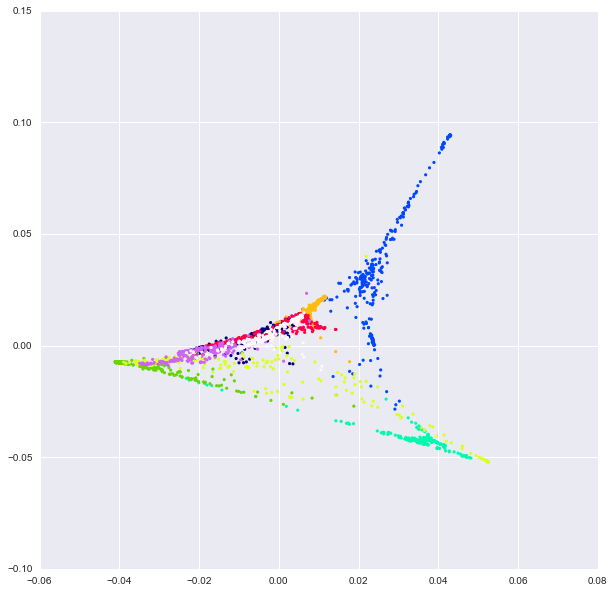

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)


In [47]:
pca = PCA(n_components=2).fit_transform(X)

In [48]:
pca[:,0]

array([-5.21124247, -4.81069394, -4.0247741 , ...,  8.13923404,
        8.056428  ,  7.56646227])

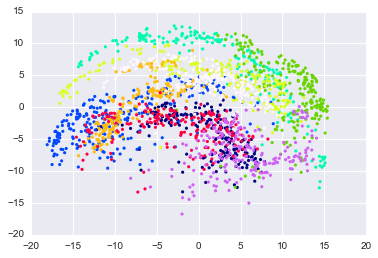

In [50]:
plt.scatter(pca[:,0],pca[:,1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)

In [51]:

X_ = X.as_matrix()
Y_ = Y.Class.cat.codes.as_matrix()

In [52]:
Y_

array([0, 0, 0, ..., 8, 8, 8], dtype=int8)

In [53]:
sss = StratifiedShuffleSplit(Y_, 3, test_size=0.7)

for train_index, test_index in sss:
    X_train, X_test = X_[train_index], X_[test_index]
    #Y_train, Y_test = labels.iloc[train_index], labels.iloc[test_index]
    Y_train, Y_test = Y_[train_index], Y_[test_index]

In [54]:
Y_train

array([2, 5, 0, 3, 8, 6, 7, 7, 4, 5, 3, 7, 0, 4, 3, 0, 7, 5, 7, 5, 3, 5, 8,
       5, 8, 0, 5, 8, 1, 8, 5, 7, 6, 8, 7, 6, 7, 0, 4, 5, 4, 3, 2, 4, 4, 5,
       5, 8, 1, 2, 5, 7, 0, 4, 3, 0, 2, 1, 1, 7, 3, 4, 1, 4, 3, 7, 8, 1, 2,
       4, 2, 4, 5, 3, 8, 7, 7, 0, 5, 7, 2, 7, 7, 0, 4, 8, 2, 6, 7, 0, 3, 5,
       7, 1, 4, 1, 8, 0, 7, 8, 6, 3, 5, 7, 3, 4, 4, 5, 4, 0, 6, 1, 1, 0, 4,
       6, 2, 1, 1, 1, 2, 3, 6, 3, 1, 1, 0, 8, 2, 6, 0, 8, 6, 0, 7, 0, 4, 1,
       8, 3, 1, 2, 5, 8, 3, 2, 8, 6, 3, 6, 6, 6, 7, 6, 3, 4, 2, 3, 1, 6, 0,
       4, 0, 3, 0, 2, 1, 3, 7, 2, 6, 1, 1, 3, 8, 7, 6, 6, 7, 2, 4, 7, 1, 3,
       2, 2, 7, 2, 6, 5, 2, 4, 1, 8, 6, 7, 1, 6, 4, 1, 6, 5, 2, 5, 1, 1, 3,
       0, 6, 6, 5, 8, 4, 0, 7, 2, 4, 4, 6, 1, 2, 1, 3, 6, 5, 0, 2, 1, 5, 6,
       5, 3, 7, 8, 7, 3, 3, 6, 2, 6, 2, 7, 5, 4, 3, 2, 6, 6, 0, 0, 8, 1, 5,
       0, 0, 1, 2, 2, 3, 2, 4, 3, 3, 5, 3, 4, 8, 3, 2, 1, 3, 2, 0, 0, 1, 5,
       7, 4, 7, 1, 8, 4, 5, 2, 8, 0, 8, 6, 2, 0, 4, 7, 2, 1, 7, 6, 6, 0, 3,
       4, 5,

In [55]:
clf = svm.SVC(decision_function_shape='ovo', probability=True)
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
pred_train = clf.predict_proba(X_train)
pred_test = clf.predict_proba(X_test)
pred_test_class = clf.predict(X_test)

In [57]:
log_loss(Y_test, pred_test)

0.42801710845749075

In [58]:
log_loss(Y_train, pred_train)

0.28344018175814739

In [59]:
confusion_matrix(Y_test, pred_test_class)

array([[108,   0,   0,   0,   1,   9,   4,  24,   0],
       [  0, 176,   2,   0,   0,   4,   0,   0,   0],
       [  0,   0, 125,   0,  15,   0,   0,   0,   0],
       [  1,   0,   0, 130,   4,   0,   1,  12,   0],
       [  0,   5,   0,  11, 115,   0,   1,   1,  13],
       [  0,   0,   0,   0,   0, 130,  10,   0,   4],
       [ 10,   3,   0,   0,   0,  11, 106,  15,   0],
       [  0,   1,   0,   4,   1,   0,   0, 141,   0],
       [  0,   0,   0,   7,   4,   0,   1,   1, 132]])

In [60]:
labels = Y.Class.cat.categories.values

In [61]:
pd.crosstab(Y_test, pred_test_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,108,0,0,0,1,9,4,24,0,146
1,0,176,2,0,0,4,0,0,0,182
2,0,0,125,0,15,0,0,0,0,140
3,1,0,0,130,4,0,1,12,0,148
4,0,5,0,11,115,0,1,1,13,146
5,0,0,0,0,0,130,10,0,4,144
6,10,3,0,0,0,11,106,15,0,145
7,0,1,0,4,1,0,0,141,0,147
8,0,0,0,7,4,0,1,1,132,145


In [62]:
c = 0
for i in labels:
    print(str(c) + " "+ i)
    c += 1

0 cityhall
1 deep1
2 deep2
3 fountain
4 gun
5 spurn
6 statue_family
7 statue_net
8 steam


In [63]:
outcomes = pd.DataFrame({'TrueVal' : Y_test, 'PredVal' : pred_test_class, 'Correct': np.nan})
outcomes = outcomes[[2,1,0]]

In [64]:
outcomes.Correct = 0
outcomes.loc[outcomes['TrueVal'] == outcomes['PredVal'], 'Correct'] = 1

In [66]:
outcomes.iloc[idx]

,TrueVal,PredVal,Correct
10,6,5,0
54,6,5,0
72,6,7,0
80,6,1,0
101,6,5,0
...,...,...,...
1259,6,5,0
1289,6,7,0
1296,6,7,0
1298,6,7,0


In [67]:
test = pd.DataFrame(pred_test[idx])
test

,0,1,2,3,4,5,6,7,8
0,0.047176,0.291552,0.002557,0.002002,0.018140,0.298758,0.328574,0.007848,0.003395
1,0.035258,0.119420,0.003423,0.002058,0.023517,0.514631,0.290891,0.005535,0.005269
2,0.132876,0.003201,0.001825,0.066785,0.005071,0.012376,0.075323,0.687377,0.015165
3,0.054977,0.506597,0.012563,0.006146,0.012164,0.020541,0.285598,0.011134,0.090279
4,0.429153,0.022300,0.002437,0.003294,0.007638,0.255973,0.242015,0.007398,0.029793
...,...,...,...,...,...,...,...,...,...
34,0.316383,0.059692,0.002924,0.003344,0.009926,0.235416,0.315629,0.010648,0.046038
35,0.094217,0.003433,0.002348,0.070155,0.009184,0.016676,0.087461,0.684488,0.032038
36,0.155539,0.007913,0.006335,0.077557,0.016106,0.007342,0.194289,0.482607,0.052313
37,0.216809,0.003500,0.001858,0.040089,0.004027,0.012435,0.156566,0.550968,0.013748


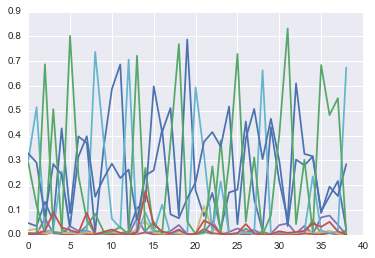

In [68]:
plt.plot(test)

In [69]:
np.mean(test[8])

0.024025722219191872

## Lets Test it all - Visualise the incorrect classes

In [70]:
pred_test = clf.predict_proba(X_)
pred_test_class = clf.predict(X_)

In [71]:
pd.crosstab(Y_, pred_test_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,156,0,0,0,1,10,8,34,0,209
1,0,253,3,0,0,4,0,0,0,260
2,0,0,182,0,17,0,0,0,1,200
3,1,1,0,190,4,0,1,15,0,212
4,0,5,0,13,175,0,1,1,14,209
5,0,0,0,0,0,188,12,0,5,205
6,13,4,0,0,0,16,154,20,0,207
7,0,1,0,5,2,0,1,201,0,210
8,0,0,0,9,4,0,1,1,192,207


In [72]:
outcomes = pd.DataFrame({'TrueVal' : Y_, 'PredVal' : pred_test_class, 'Correct': np.nan})
outcomes = outcomes[[2,1,0]]

outcomes.Correct = 0
outcomes.loc[outcomes['TrueVal'] == outcomes['PredVal'], 'Correct'] = 1

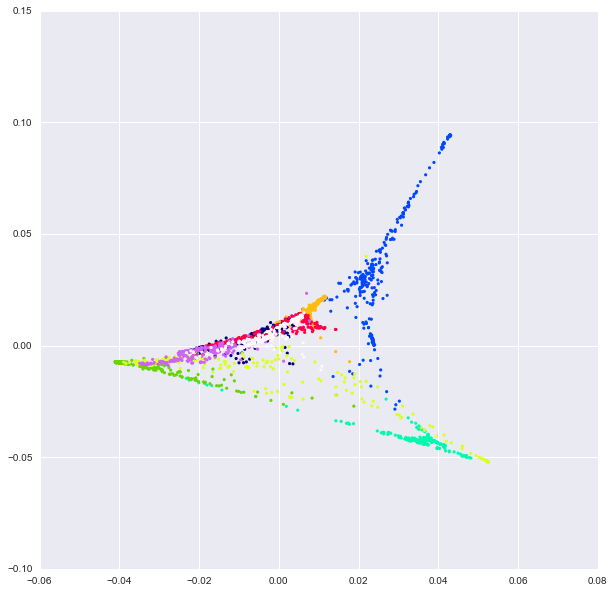

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)


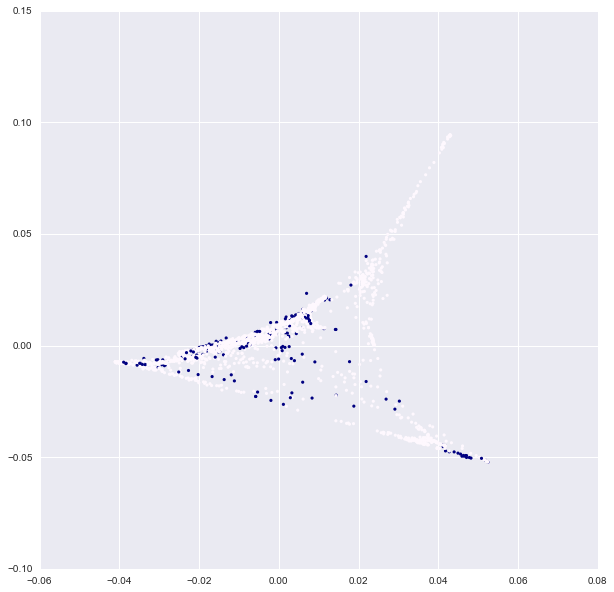

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=outcomes.Correct, cmap='gist_ncar', s=10, lw = 0)


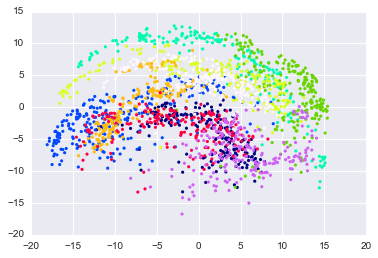

In [85]:
plt.scatter(pca[:,0],pca[:,1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)

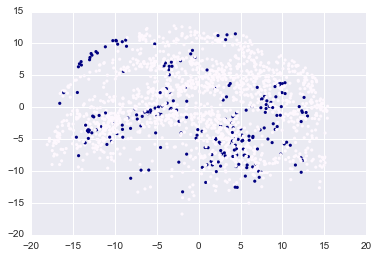

In [86]:
plt.scatter(pca[:,0],pca[:,1], c=outcomes.Correct, cmap='gist_ncar', s=10, lw = 0)

In [77]:
## Get the files which went wrong

In [78]:
working_folder = '../Data/LapsitData/'
df = pd.read_csv(working_folder + '/data.csv')
df

,Folder,File
0,cityhall,Proj4_img00000001.jpg
1,cityhall,Proj4_img00000002.jpg
2,cityhall,Proj4_img00000003.jpg
3,cityhall,Proj4_img00000004.jpg
4,cityhall,Proj4_img00000005.jpg
...,...,...
1914,steam,Proj6_img00000203.jpg
1915,steam,Proj6_img00000204.jpg
1916,steam,Proj6_img00000205.jpg
1917,steam,Proj6_img00000206.jpg


In [79]:
c = 0
for i in labels:
    print(str(c) + " "+ i)
    c += 1

0 cityhall
1 deep1
2 deep2
3 fountain
4 gun
5 spurn
6 statue_family
7 statue_net
8 steam


In [80]:
idx = outcomes[(outcomes['Correct'] == 0) & (df.Folder == 'fountain')].index.values
idx.shape

(22,)

In [81]:
sample = df.iloc[idx]
sample

,Folder,File
750,fountain,Proj3_img00000082.jpg
755,fountain,Proj3_img00000087.jpg
757,fountain,Proj3_img00000089.jpg
765,fountain,Proj3_img00000097.jpg
768,fountain,Proj3_img00000100.jpg
...,...,...
873,fountain,Proj3_img00000205.jpg
874,fountain,Proj3_img00000206.jpg
875,fountain,Proj3_img00000207.jpg
876,fountain,Proj3_img00000208.jpg


In [82]:
n = 5
m = int(math.ceil(len(idx) / n))

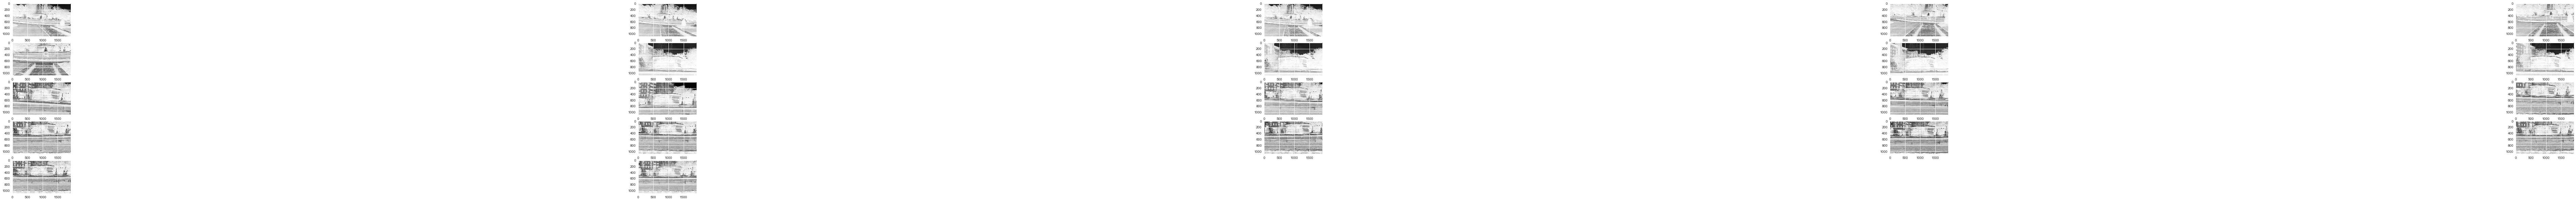

In [83]:
#fig, ax = plt.subplots(n, m, figsize=(160,10))
fig = plt.figure(figsize=(160,10))
count = 0
for i in idx:
    ax = fig.add_subplot(n, m, count+1) # this line adds sub-axes
    f = df['File'].iloc[i]
    fol = df['Folder'].iloc[i]
    img = imread(working_folder + fol +'/' + f, mode="F")
    ax.imshow(img)
    count+=1

Predict and plot all